In [53]:
import warnings
import textwrap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy
from matplotlib import pyplot, transforms
from matplotlib.text import OffsetFrom

In [16]:
df = pd.read_csv('./data/kaggle_survey_2022_responses.csv', skiprows=[0])

C:\Users\xquyv\AppData\Local\Temp\ipykernel_14388\2989873918.py:1: DtypeWarning: Columns (208,225,255,257,260,270,271,277) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/kaggle_survey_2022_responses.csv', skiprows=[0])


# Data cleaning

## Columns

In [17]:
col_mapping = pd.read_csv('./data/column_mapping.csv')

In [18]:
col_mapping_dict = {k:v for k, v in col_mapping.dropna().values}

In [19]:
df = df[col_mapping_dict.keys()].rename(columns=col_mapping_dict)

## Positions


In [20]:
pos_mapping = pd.read_csv('./data/position_mapping.csv')
pos_maping_dict = {k:v for k, v in pos_mapping.dropna().values}

In [21]:
df['title'] = df['title'].map(pos_maping_dict)

In [22]:
df = df.query('student == "No"')

In [23]:
#Drop the column student after filtering to focus on industry insights from professionals
df = df.drop(columns=['student'])
df.head(3)

,age,gender,country,education_level,published,ml_used_theoretical,ml_used_applied,ml_used_no,code_exp,program_lang_Python,...,cloud_platform_GoogleCloudPlatform(GCP),cloud_platform_IBMCloud/RedHat,cloud_platform_OracleCloud,cloud_platform_SAPCloud,cloud_platform_VMwareCloud,cloud_platform_AlibabaCloud,cloud_platform_TencentCloud,cloud_platform_HuaweiCloud,cloud_platform_None,cloud_platform_Other
0,30-34,Man,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30-34,Man,Algeria,Master’s degree,Yes,NaN,NaN,No,1-3 years,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,55-59,Man,France,Some college/university study without earning ...,NaN,NaN,NaN,NaN,10-20 years,Python,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other


In [24]:
df = df.query('title.notna() and title != "Currently not employed"')


In [25]:
df['title'].unique()

array(['Data Scientist', 'Software Engineer', 'Research Scientist',
       'Other', 'Developer Advocate', 'Data Analyst', 'Data Engineer',
       'ML/MLops Engineer', 'Engineer (non-software)',
       'Teacher/professor', 'Statistician', 'Manager',
       'Data Administrator', 'Data Architect'], dtype=object)

In [26]:
df = df.query('industry.notna()')
df.head(3)

,age,gender,country,education_level,published,ml_used_theoretical,ml_used_applied,ml_used_no,code_exp,program_lang_Python,...,cloud_platform_GoogleCloudPlatform(GCP),cloud_platform_IBMCloud/RedHat,cloud_platform_OracleCloud,cloud_platform_SAPCloud,cloud_platform_VMwareCloud,cloud_platform_AlibabaCloud,cloud_platform_TencentCloud,cloud_platform_HuaweiCloud,cloud_platform_None,cloud_platform_Other
3,55-59,Man,France,Some college/university study without earning ...,NaN,NaN,NaN,NaN,10-20 years,Python,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
7,30-34,Man,Germany,Bachelor’s degree,NaN,NaN,NaN,NaN,10-20 years,Python,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,70+,Man,Australia,Doctoral degree,Yes,NaN,"Yes, the research made use of machine learning...",NaN,20+ years,Python,...,Google Cloud Platform (GCP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#Plotting the proportions of country 
num_country = df['country'].value_counts()
num_country = num_country.reset_index()
num_country

,index,country
0,India,2678
1,United States of America,1586
2,Other,579
3,Japan,370
4,Brazil,315
5,Nigeria,168
6,France,160
7,United Kingdom of Great Britain and Northern I...,150
8,Spain,150
9,Mexico,149


## 1. Gender & Title distribution in different industries

In [28]:
position = df['title'].value_counts()
position = position.reset_index()
position

,index,title
0,Data Scientist,1913
1,Data Analyst,1513
2,Software Engineer,971
3,Manager,826
4,Teacher/professor,820
5,Other,748
6,Research Scientist,590
7,ML/MLops Engineer,562
8,Engineer (non-software),463
9,Data Engineer,341


In [29]:
position['Group'] = position['index'].where(position['title'] > 100, 'Other')
position

,index,title,Group
0,Data Scientist,1913,Data Scientist
1,Data Analyst,1513,Data Analyst
2,Software Engineer,971,Software Engineer
3,Manager,826,Manager
4,Teacher/professor,820,Teacher/professor
5,Other,748,Other
6,Research Scientist,590,Research Scientist
7,ML/MLops Engineer,562,ML/MLops Engineer
8,Engineer (non-software),463,Engineer (non-software)
9,Data Engineer,341,Data Engineer


In [30]:
group_position = position.groupby('Group')['title'].sum().reset_index().sort_values(by='title', ascending=False)
group_position

,Group,title
2,Data Scientist,1913
0,Data Analyst,1513
6,Other,972
8,Software Engineer,971
5,Manager,826
10,Teacher/professor,820
7,Research Scientist,590
4,ML/MLops Engineer,562
3,Engineer (non-software),463
1,Data Engineer,341


In [31]:
def plot_positions(group_position, ax):
    labels = group_position['Group']
    sizes = group_position['title']
    colors = ['#A6ABAD','#00587A', '#0073A1', '#00A1E0','#00BCE3','#87CEEB', '#89BCC4', '#9BD3DD', '#A4E0EB']
    
    patches, labels_, percentages = ax.pie(
        sizes, colors=colors,
        wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
        textprops={'color': 'white', 'fontweight': 'bold','fontname': "Sans Serif"},
        startangle=90, frame=True,
        autopct="%.2f%%",
        pctdistance=0.85,
    )

    ax.axis('off')

    ax.add_artist(plt.Circle((0, 0), 0.6, color='white', linewidth=0))

    # Adding Title of chart
    ax.set_title('Popular positions from surveyors', fontweight = 'bold', size = 15, fontfamily='serif', ha="center", color="#4d4d4d")

    ax.legend(labels, loc='upper right', bbox_to_anchor=(1.35, 0.75))


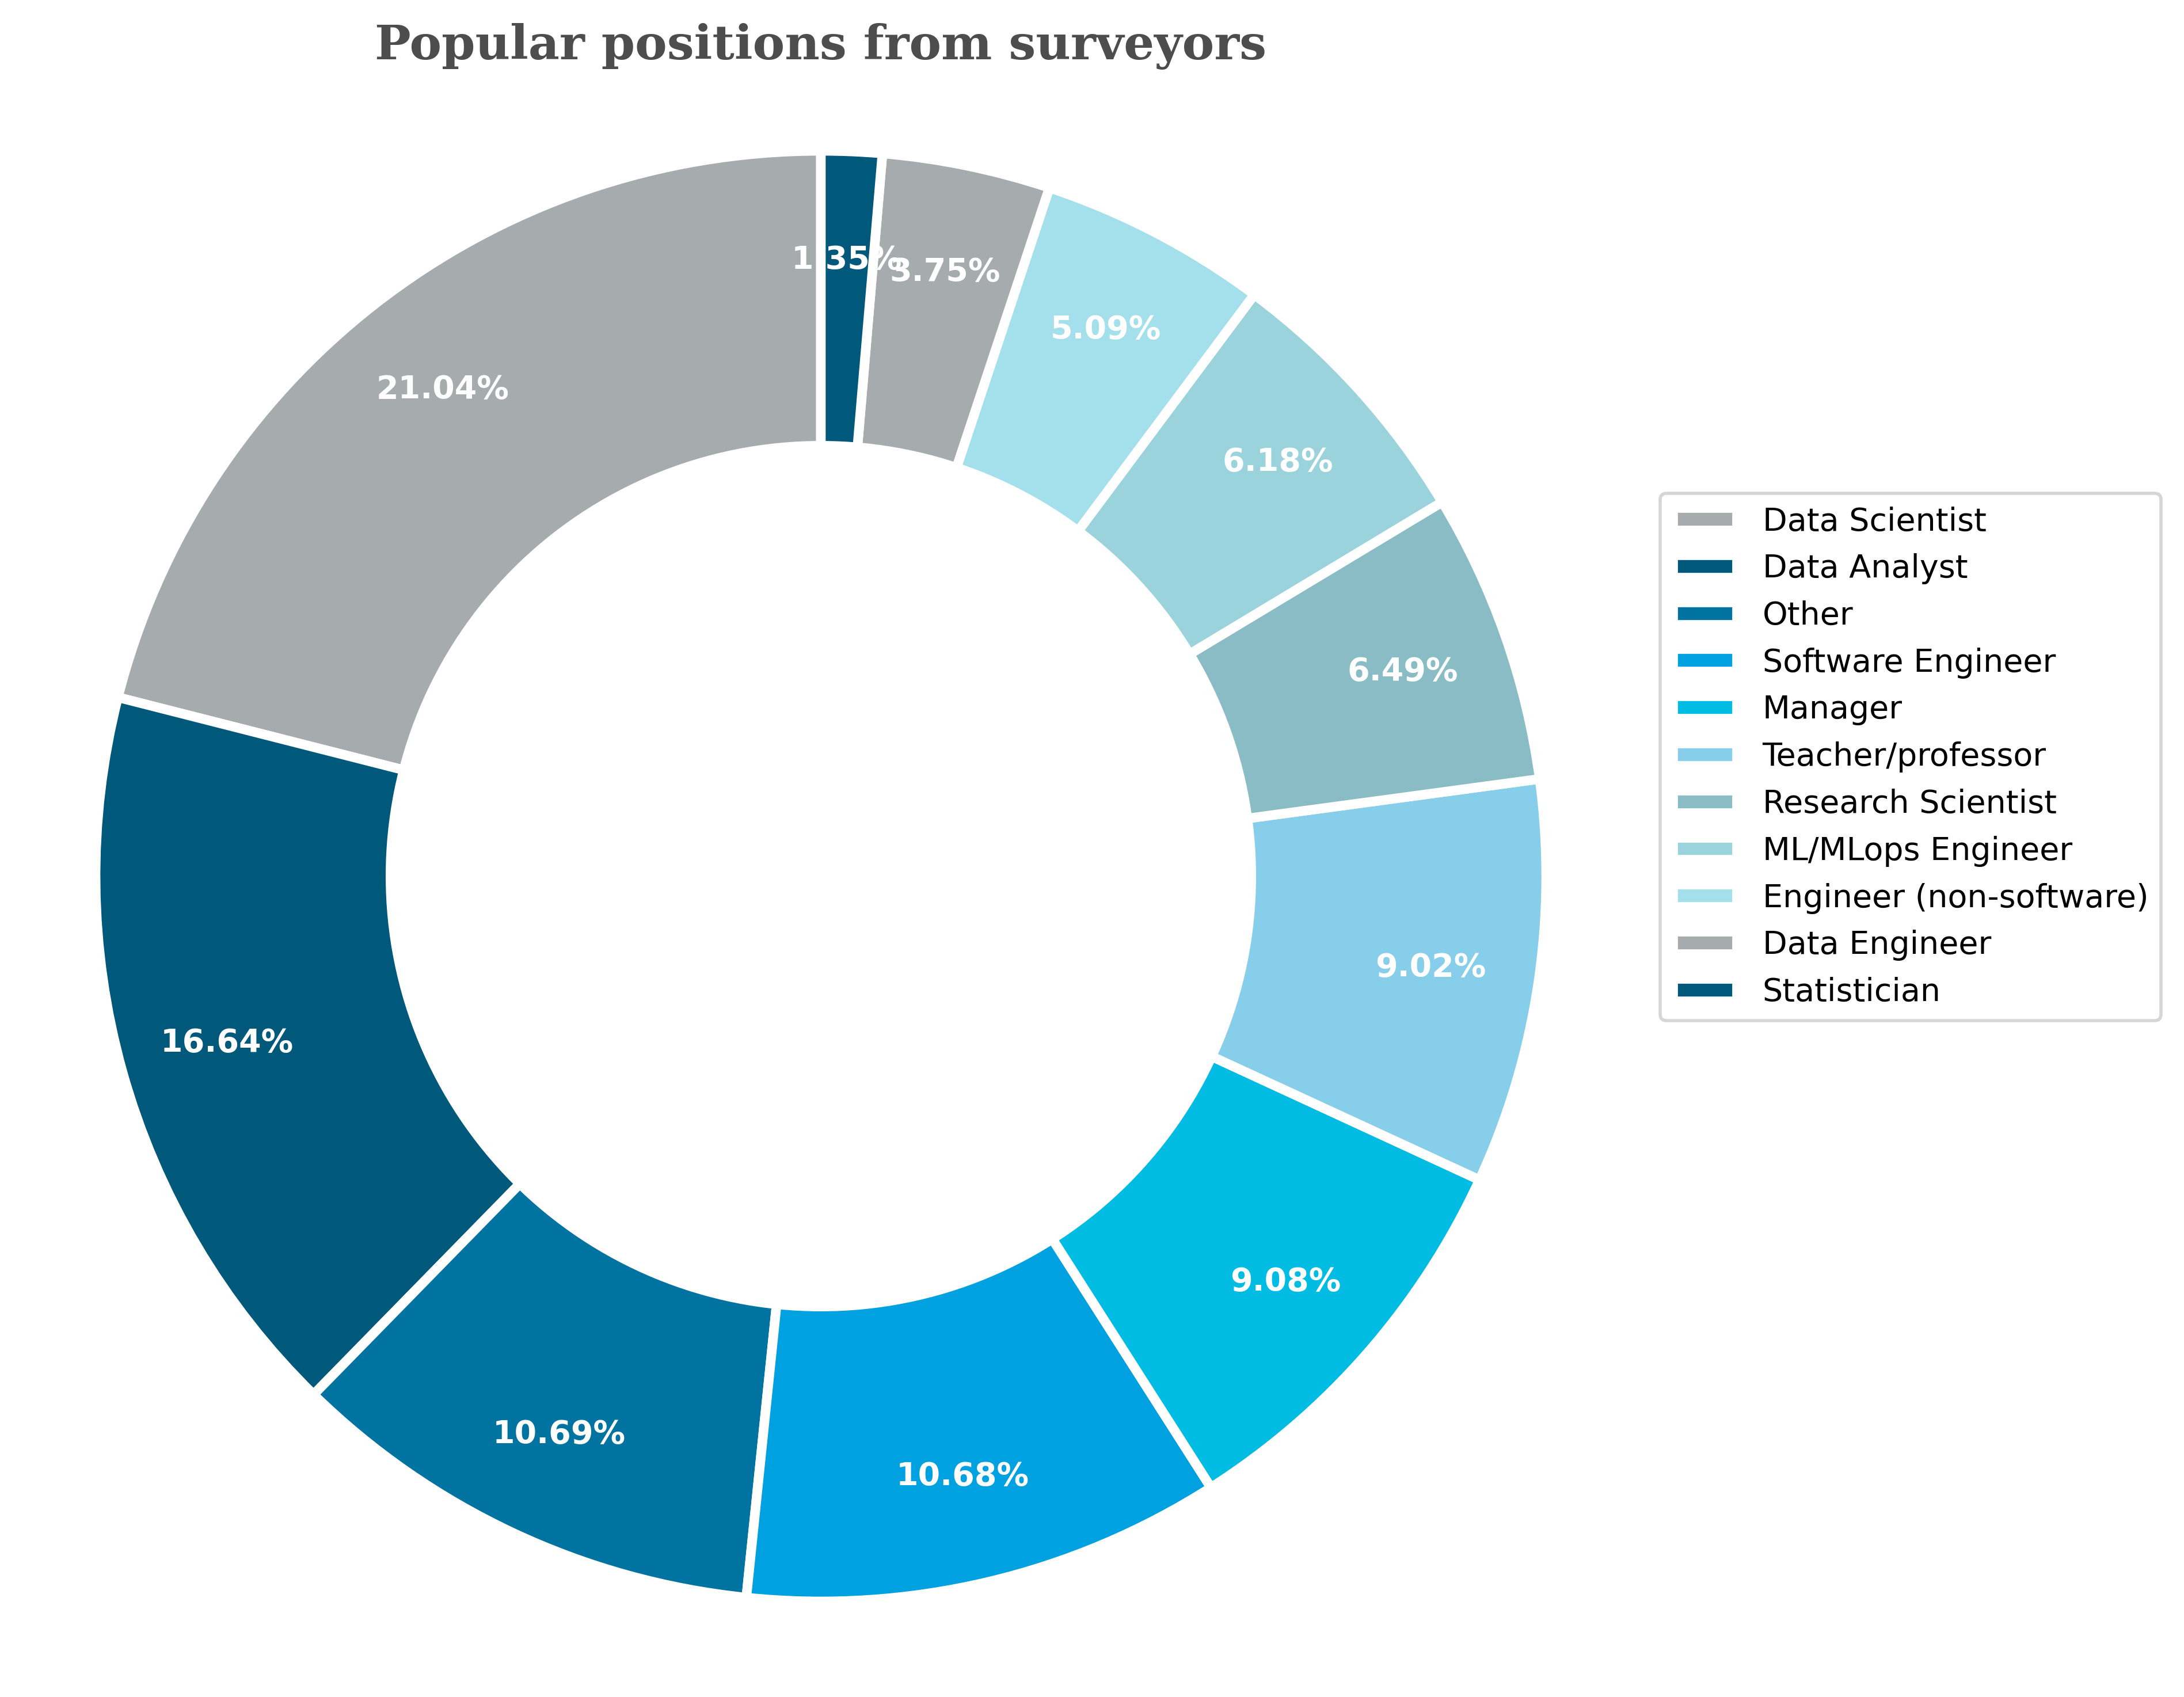

In [32]:
fig, axs = plt.subplots(figsize=(15,9), dpi=400)
plot_positions(group_position, axs)
plt.show()

## Gender and Title distribution across and within industry

In [33]:
df['count'] = 1

In [43]:
position_order = sorted(df['title'].unique().tolist())
position_order

['Data Administrator',
 'Data Analyst',
 'Data Architect',
 'Data Engineer',
 'Data Scientist',
 'Developer Advocate',
 'Engineer (non-software)',
 'ML/MLops Engineer',
 'Manager',
 'Other',
 'Research Scientist',
 'Software Engineer',
 'Statistician',
 'Teacher/professor']

In [44]:
industry_order = sorted(df['industry'].unique().tolist())
industry_order

['Academics/Education',
 'Accounting/Finance',
 'Broadcasting/Communications',
 'Computers/Technology',
 'Energy/Mining',
 'Government/Public Service',
 'Insurance/Risk Assessment',
 'Manufacturing/Fabrication',
 'Marketing/CRM',
 'Medical/Pharmaceutical',
 'Non-profit/Service',
 'Online Service/Internet-based Services',
 'Other',
 'Retail/Sales',
 'Shipping/Transportation']

In [45]:
data_q5q15 = pd.pivot_table(df, values='count', index=['title'], columns=['industry'], aggfunc=np.sum).fillna(0).astype(int).loc[position_order, industry_order].stack()
data_q5q15_man = pd.pivot_table(df[df['gender']=='Man'], values='count', index=['title'], columns=['industry'], aggfunc=np.sum).fillna(0).astype(int).loc[position_order, industry_order].stack()
data_q5q15_woman = pd.pivot_table(df[df['gender']=='Woman'], values='count', index=['title'], columns=['industry'], aggfunc=np.sum).fillna(0).astype(int).loc[position_order, industry_order].stack()

In [46]:
def drawPieMarker(xs, ys, ratios, sizes, colors, ax):
    markers = []
    previous = 0
    # calculate the points of the pie pieces
    for color, ratio in zip(colors, ratios):
        this = 2 * np.pi * ratio + previous
        x  = [0] + np.cos(np.linspace(previous, this, 30)).tolist() + [0]
        y  = [0] + np.sin(np.linspace(previous, this, 30)).tolist() + [0]
        xy = np.column_stack([x, y])
        previous = this
        markers.append({'marker':xy, 's':np.abs(xy).max()**2*np.array(sizes), 'facecolor':color})

    # scatter each of the pie pieces to create pies
    for marker in markers:
        ax.scatter(xs, ys, **marker, alpha=0.7)

In [47]:
# Define function for marker
# def count_to_size(val):
#     max_sz = 20
#     min_sz = 3
#     return np.sqrt((val - 1) / (80 - 1)) * (max_sz - min_sz) + min_sz

In [196]:
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    fig = plt.figure(figsize=(22, 25), dpi=200)

    gs = fig.add_gridspec(5, 5)

    ax_plot = fig.add_subplot(gs[1:4, 0:4]) 
    for q5_idx in position_order[::-1]:
        for q15_idx in industry_order:
            man = data_q5q15_man[q5_idx][q15_idx]
            woman = data_q5q15_woman[q5_idx][q15_idx]
            tot = data_q5q15[q5_idx][q15_idx]
            drawPieMarker([q15_idx],[q5_idx], [man/(man+woman), woman/(man+woman)], [tot*7], ['#004c70', '#990000'], ax=ax_plot)

    ax_plot.grid(linewidth=0.2, zorder=0)        

    ax_plot.tick_params(axis='x', labelrotation=90)

    # region Industry
    ax_int = fig.add_subplot(gs[0, :4], sharex=ax_plot) 
    data_q15_woman = df[df['gender']=='Woman']['industry'].value_counts()[industry_order]
    ax_int.bar(data_q15_woman.index, data_q15_woman, width=0.45, alpha=0.7, color='#990000', label='Female')

    data_q15_man = df[df['gender']=='Man']['industry'].value_counts()[industry_order]
    ax_int.bar(data_q15_man.index, data_q15_man, bottom=data_q15_woman , width=0.45, alpha=0.7, color='#004c70', label='Male')

    plt.setp(ax_int.get_xticklabels(), visible=False)
    # endregion


    # region Title
    ax_tit = fig.add_subplot(gs[1:4, 4], sharey=ax_plot) 

    data_q5_woman = df[df['gender']=='Woman']['title'].value_counts()[position_order]
    ax_tit.barh(data_q5_woman.index[::-1], data_q5_woman[::-1], height=0.55, alpha=0.7, color='#990000')

    data_q5_man = df[df['gender']=='Man']['title'].value_counts()[position_order]
    ax_tit.barh(data_q5_man.index[::-1], data_q5_man[::-1], left= data_q5_woman[::-1],height=0.55, alpha=0.7, color='#004c70')

    plt.setp(ax_tit.get_yticklabels(), visible=False)
    # endregion

    # Spines
    for s in ['top', 'left', 'right', 'bottom']:
        ax_plot.spines[s].set_visible(False)
        ax_int.spines[s].set_visible(False)
        ax_tit.spines[s].set_visible(False)
        

    fig.text(0.6, 0.9, 'Gender & Title distribution by Industry', fontweight='bold', fontfamily='serif', fontsize=35, ha='right') 
    fig.text(0.6, 0.88, 'Source: Data Professionals - Kaggle Survey 2022', fontweight='light', style= 'italic', fontfamily='serif', fontsize=15, ha='right')

    # Legend
    legend_gender = ax_int.legend(bbox_to_anchor=(1.2, 1.1), fontsize=16, frameon=False, title='Gender', title_fontsize=20)
    legend_count = ax_int.annotate(
        'Count of professionals',
        xy=(0.1, 0.1),
        textcoords=OffsetFrom(legend_gender, (0.5, -0.5)),
        xytext=(0, 0),
        fontsize=20,
        ha='center',
    )

    corner_ax = fig.add_subplot(gs[0, 4], zorder=-1)
    corner_ax.set_axis_off()
    for s in ['top', 'left', 'right', 'bottom']:
        corner_ax.spines[s].set_visible(False)

    ax_count = corner_ax.inset_axes([0, 0, 1, 0.5])
    ax_count.set_axis_off()
    sizes = [50, 100, 200]
    x_coords = [0] * len(sizes)
    y_coords = np.arange(len(sizes))
    ax_count.scatter(x_coords, y_coords, marker='o', s=[size*7 for size in sizes], c='#990000', alpha=0.7)
    ax_count.set_xlim(-0.02, 0.06)
    ax_count.set_ylim(-0.5, 2.5)

    for size, x, y in zip(sizes, x_coords, y_coords):
        ax_count.annotate(str(size), (x + 0.015, y-0.15), fontsize=16)

    plt.savefig('./charts/gender title by industry.png')
    plt.close('all')

## 2. Education levels in different titles